In [1]:
import os

In [2]:
cur_dir = os.getcwd()
data_dir = cur_dir
#data_dir = os.path.join(cur_dir, 'oxford_pet')
image_dir = os.path.join(data_dir, 'images')
bbox_dir = os.path.join(data_dir, 'annotations', 'xmls')
seg_dir = os.path.join(data_dir, 'annotations', 'trimaps')

In [3]:
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
print(len(image_files))

7378


In [4]:
bbox_files = [fname for fname in os.listdir(bbox_dir) if os.path.splitext(fname)[-1] == '.xml']
print(len(bbox_files))

3685


In [5]:
seg_files = [fname for fname in os.listdir(seg_dir) if os.path.splitext(fname)[-1] == '.png']
print(len(seg_files))

14780


In [6]:
image_files[:10]

['Abyssinian_1.jpg',
 'Abyssinian_10.jpg',
 'Abyssinian_100.jpg',
 'Abyssinian_101.jpg',
 'Abyssinian_102.jpg',
 'Abyssinian_103.jpg',
 'Abyssinian_104.jpg',
 'Abyssinian_105.jpg',
 'Abyssinian_106.jpg',
 'Abyssinian_107.jpg']

In [7]:
bbox_files[:10]

['Abyssinian_1.xml',
 'Abyssinian_10.xml',
 'Abyssinian_100.xml',
 'Abyssinian_101.xml',
 'Abyssinian_102.xml',
 'Abyssinian_103.xml',
 'Abyssinian_105.xml',
 'Abyssinian_106.xml',
 'Abyssinian_107.xml',
 'Abyssinian_108.xml']

In [8]:
seg_files[:10]

['._Abyssinian_1.png',
 '._Abyssinian_10.png',
 '._Abyssinian_100.png',
 '._Abyssinian_101.png',
 '._Abyssinian_102.png',
 '._Abyssinian_103.png',
 '._Abyssinian_104.png',
 '._Abyssinian_105.png',
 '._Abyssinian_106.png',
 '._Abyssinian_107.png']

In [9]:
import random
import numpy as np
from PIL import Image
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

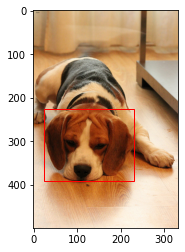

In [10]:
rnd_idx = random.randint(1, len(image_files))
fname = image_files[rnd_idx]
fpath = os.path.join(image_dir, fname)
image = Image.open(fpath)
image = np.array(image)

bbox_name = os.path.splitext(fname)[0]+'.xml'
bbox_path = os.path.join(bbox_dir, bbox_name)
tree = et.parse(bbox_path)

width = float(tree.find('./size/width').text)
height = float(tree.find('./size/height').text)
xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin
rect_y = ymin
rect_w = xmax-xmin
rect_h = ymax-ymin

rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')
plt.axes().add_patch(rect)
plt.imshow(image)
plt.show()

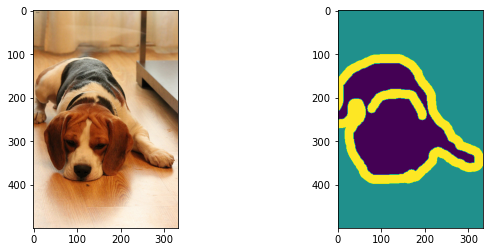

In [11]:
sname = os.path.splitext(fname)[0]+'.png'
spath = os.path.join(seg_dir, sname)
seg = Image.open(spath)
seg = np.array(seg)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(seg)
plt.show()